**L069_K_means.ipynb**

2024 JUN 07

Tershire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df = pd.DataFrame(iris_dataset.data, columns=columns)

In [4]:
display(iris_df.head(3))

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


# model

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)

# training

In [7]:
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [8]:
print(kmeans.labels_)  # centroid indices: different from target.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [9]:
#
kmeans.fit_predict(iris_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [10]:
#
kmeans.fit_transform(iris_df)  # distance between data sample and its winning centroid (cluster ID).

array([[3.41251117, 0.14135063, 5.03132789],
       [3.38963991, 0.44763825, 5.08750645],
       [3.56011415, 0.4171091 , 5.25229169],
       [3.412319  , 0.52533799, 5.12704282],
       [3.4603117 , 0.18862662, 5.07638109],
       [3.14251434, 0.67703767, 4.6529179 ],
       [3.50715704, 0.4151867 , 5.18485505],
       [3.32903073, 0.06618157, 4.97466956],
       [3.56110404, 0.80745278, 5.3020706 ],
       [3.34972272, 0.37627118, 5.04034023],
       [3.31978466, 0.4824728 , 4.86909709],
       [3.30275389, 0.25373214, 4.96948678],
       [3.45734945, 0.50077939, 5.1637448 ],
       [3.89486669, 0.91322505, 5.62559662],
       [3.64453145, 1.01409073, 5.07819914],
       [3.49280098, 1.20481534, 4.85660046],
       [3.49087612, 0.6542018 , 5.00219478],
       [3.37762449, 0.1441527 , 4.99534695],
       [3.10971292, 0.82436642, 4.58840834],
       [3.37135761, 0.38933276, 4.94411371],
       [3.06922637, 0.46344363, 4.66670189],
       [3.30868004, 0.3286031 , 4.89580185],
       [3.

# analysis

In [11]:
iris_df["target"] = iris_dataset.target  # target
iris_df["cluster"] = kmeans.labels_  # cluster ID

display(iris_df)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [12]:
clustering_result = iris_df.groupby(["target", "cluster"]).count()
print(clustering_result)

                sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                  47           47            47           47
       2                   3            3             3            3
2      0                  14           14            14           14
       2                  36           36            36           36


In [13]:
clustering_result = iris_df.groupby(["target", "cluster"])["sepal_length"].count()
print(clustering_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


# dimension reduction

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris_dataset.data)

iris_df["pca_feature_1"] = X_pca[:, 0]
iris_df["pca_feature_2"] = X_pca[:, 1]
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_feature_1,pca_feature_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


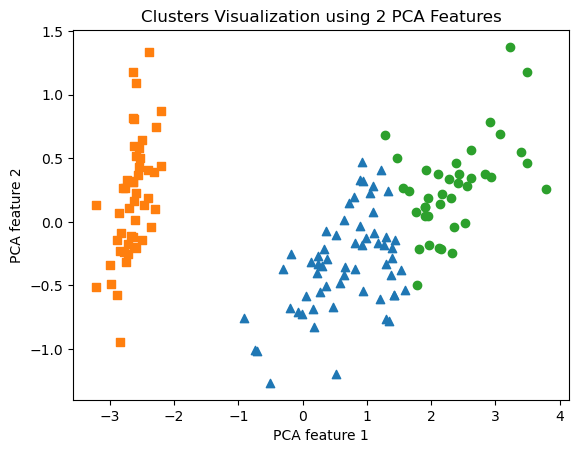

In [16]:
indices_for_each_cluster = []
for i in range(3):
    indices_for_each_cluster.append(iris_df[iris_df["cluster"]==i].index)

markers = ['^', 's', 'o']
for i in range(3):
    indices = indices_for_each_cluster[i]
    plt.scatter(x=iris_df.loc[indices, "pca_feature_1"],
                y=iris_df.loc[indices, "pca_feature_2"],
                marker=markers[i])

plt.xlabel("PCA feature 1")
plt.ylabel("PCA feature 2")
plt.title("Clusters Visualization using 2 PCA Features")
plt.show()

**another method**

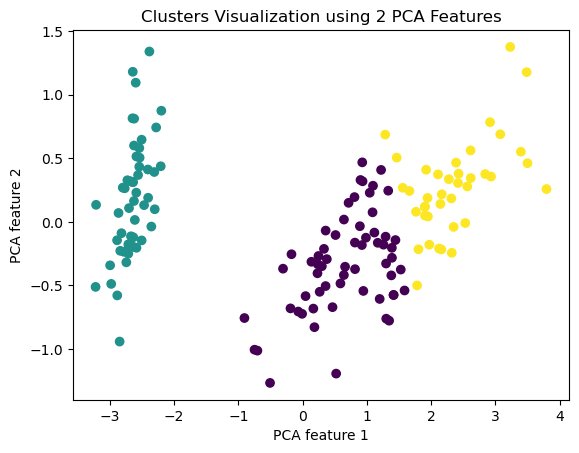

In [17]:
plt.scatter(x=iris_df.loc[:, "pca_feature_1"],
            y=iris_df.loc[:, "pca_feature_2"],
            c=iris_df["cluster"])

plt.xlabel("PCA feature 1")
plt.ylabel("PCA feature 2")
plt.title("Clusters Visualization using 2 PCA Features")
plt.show()